# Dimensionality reduction examples
Shahryar Noei

Originally designed by Marco Chierici & Giuseppe Jurman

May 13, 2025

## Visualising high-dimensional datasets using PCA and t-SNE

We will use the MNIST-dataset in this write-up. 
There is no need to download the dataset manually as we can grab it through using Scikit-Learn.

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

Let's then start by loading in the MNIST original data from the default `$HOME/scikit_learn_data/openml/` location (the data will be downloaded the first time the `fetch_openml` function is called):

In [2]:
# the following will take a while:
mnist = fetch_openml('mnist_784', parser='auto')
df = mnist.data / 255.0
y = mnist.target
print(df.shape, y.shape)

(70000, 784) (70000,)


The data is already provided as Pandas DataFrame. For convenience, we add the labels as a new column in the dataframe.

In [3]:
feat_cols = df.columns
df['y'] = y.cat.codes
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [4]:
df.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  y  
0       0.0       0.0       0.0  5  
1       0.0       0.0       0.0  0  
2       0.0       0.0       0.0  4  
3       0.0       0.0       0.0  1  
4       0.0       0.0       0.0  9  

[5 rows x 785 columns]

Because we don't want to use 70,000 digits in all calculations, we take a random subset of the digits. 

We create a random permutation of numbers from 0 to 69,999, which allows us later to select the first five or ten thousand for our calculations and visualisations.

In [5]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

We now have our dataframe and our randomisation vector ready. Let's first check what these numbers actually look like. To do this we generate plots of 15 randomly selected images.

<Figure size 640x480 with 0 Axes>

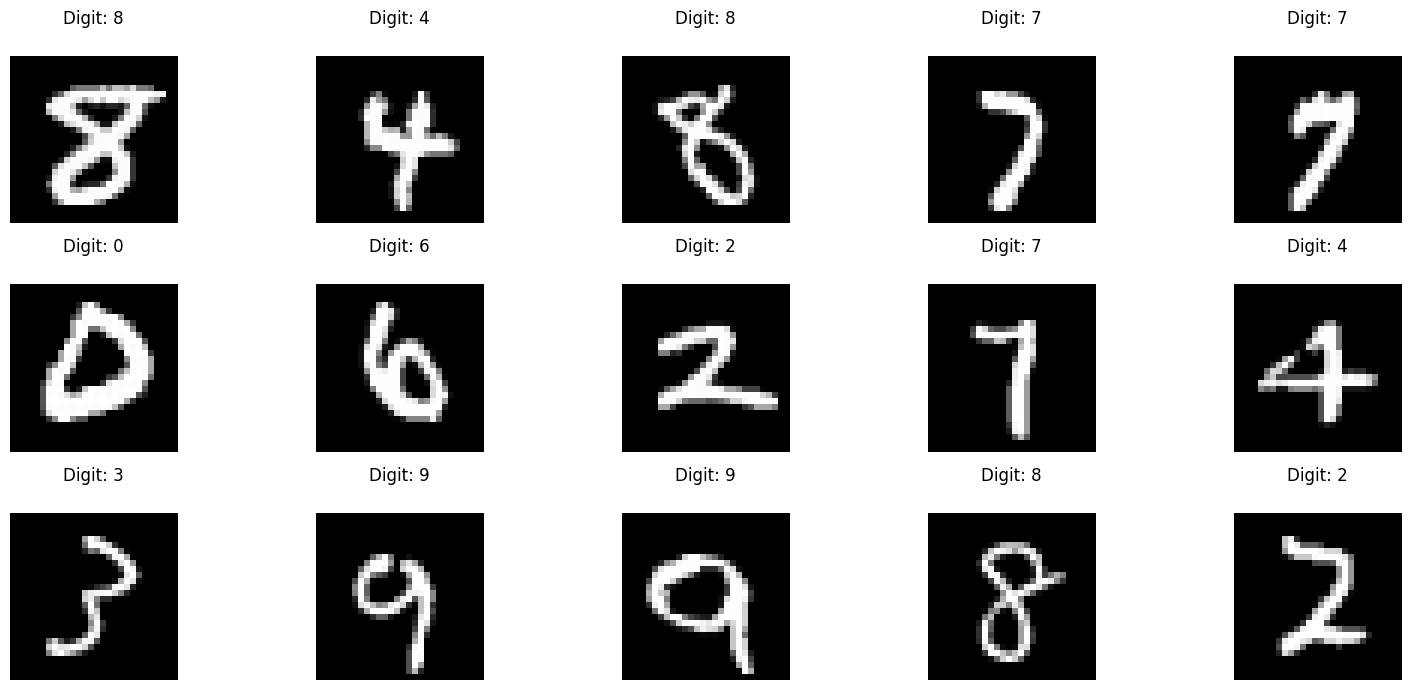

In [6]:
plt.gray()
fig = plt.figure(figsize=(16, 7))

for i in range(0, 15):
    ax = fig.add_subplot(3, 5, i+1, title=f"Digit: {df.loc[rndperm[i],'y']}")
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28, 28)).astype(float))#matshow to show a matrix (even imgshow)
    plt.axis('off')

plt.tight_layout()
plt.show()

Now we can start thinking about how we can actually distinguish the zeros from the ones and twos, and so on. If you were, for example, a post office such an algorithm could help you read and sort the handwritten envelopes using a machine instead of having humans do that. Obviously, nowadays there are very advanced methods to do this, but this dataset still provides a very good testing ground for seeing how specific methods for dimensionality reduction work and how well they work.

The images are all 28-by-28 pixel images: therefore, we have a total of 784 variables ("dimensions"), each holding the value of one specific pixel.

What we can do is reduce the number of dimensions drastically whilst trying to retain as much of the variation in the data as possible. We start out with Principal Component Analysis.

Initially we generate, from the original 784 dimensions, the first three principal components. We also check how much of the variation in the total dataset they actually account for.

In [7]:
# remember that it is important to centralize and standardize the values
# otherwise, axis will have different "meaning"

# instantiate a PCA object
pca = PCA(n_components=3)
# compute PCA and transform the data
pca_result = pca.fit_transform(df[feat_cols].values)
# save to dataframe
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1] 
df['pca-three'] = pca_result[:, 2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


In [8]:
pca.explained_variance_ratio_.sum()
#this is the total variance retained from the 3 componnets

np.float64(0.23051091490096476)

Now, given that the first three components account for 23% of the variation in the entire dataset, let's see if that is enough to visually set the different digits apart. 

We can create a scatterplot of the first and second principal component, and color each of the different types of digits with a different color. 
If these principal components capture enough variation, we can suppose that the same type of digits would be positioned (i.e., clustered) together in groups, which would mean that the first two principal components actually tell us a great deal about the specific types of digits.

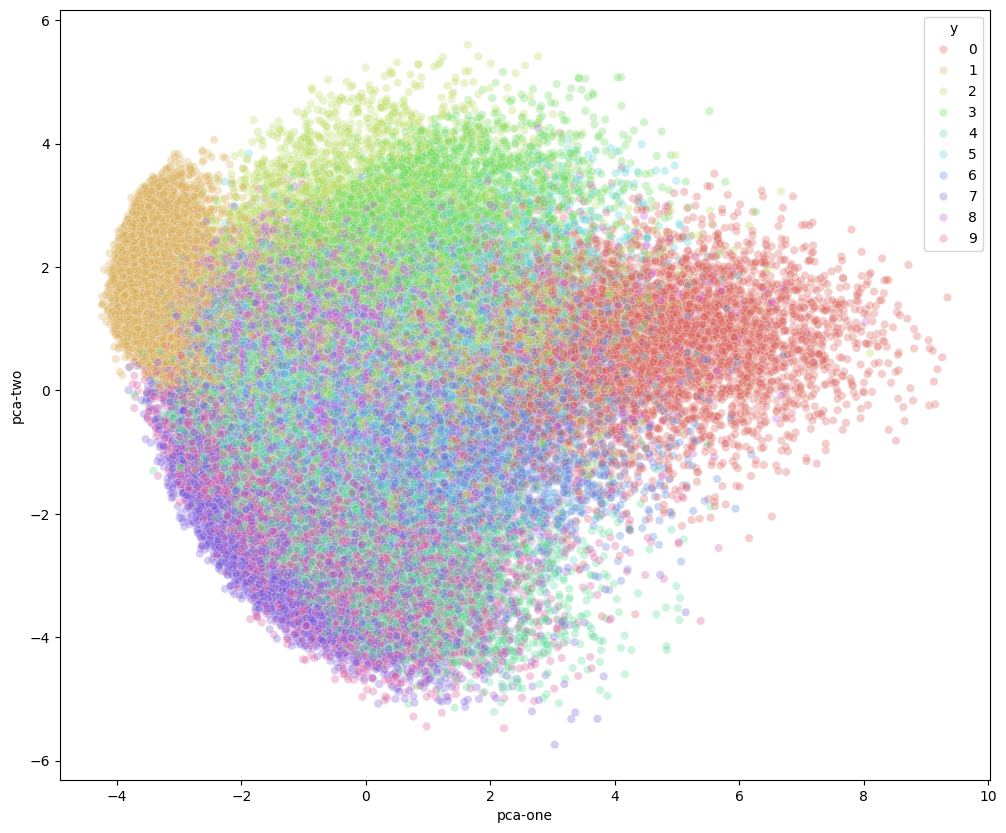

In [9]:
plt.figure(figsize=(12, 10))

sns.scatterplot(
    x="pca-one", y="pca-two",
    data=df,
    hue="y",
    palette=sns.color_palette("hls", 10),
    # legend="full",
    alpha=0.3,
)

plt.show()

For a 3D version of the same plot:

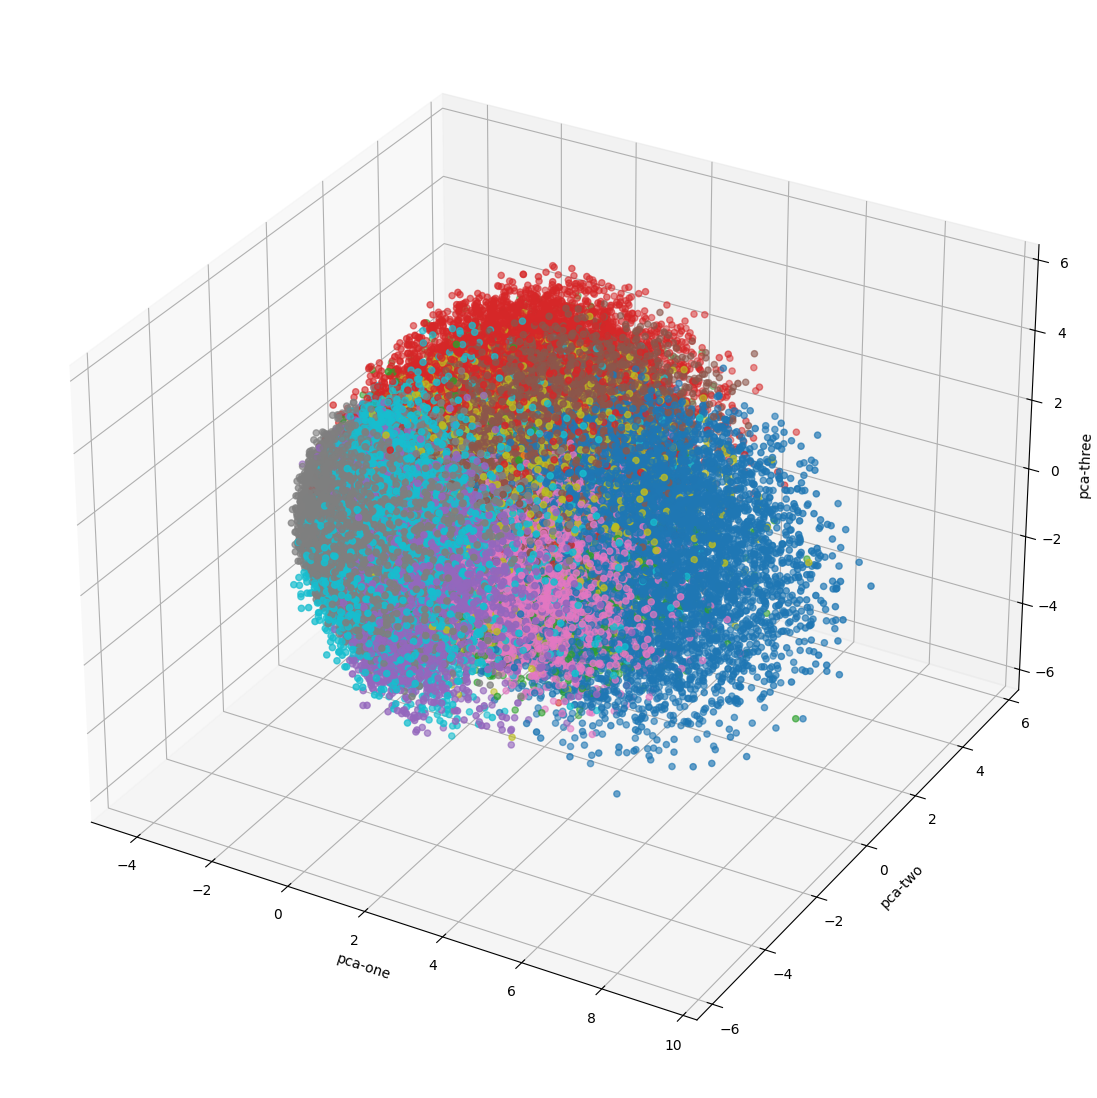

In [10]:
fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"], 
    cmap='tab10'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

From the graph we can see that the components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart.

## t-SNE

Let's see if t-SNE can be of help here: we will first try to run the algorithm on the actual dimensions of the data (784) and see how it performs. 

To make sure we don't burden our machine in terms of memory and power/time we will **only use the first 10,000 samples** to run the algorithm on. To compare later on, we also run the PCA again on this subset.

In [11]:
N = 10000
df_subset = df.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1] 
df_subset['pca-three'] = pca_result[:, 2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [12]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...


/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 1.374s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.117974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.848083
[t-SNE] KL divergence after 300 iterations: 2.770878
t-SNE done! Time elapsed: 12.596421480178833 seconds


Now that we have the two resulting dimensions, we can again visualise them by creating a scatterplot and coloring each sample by its corresponding label.

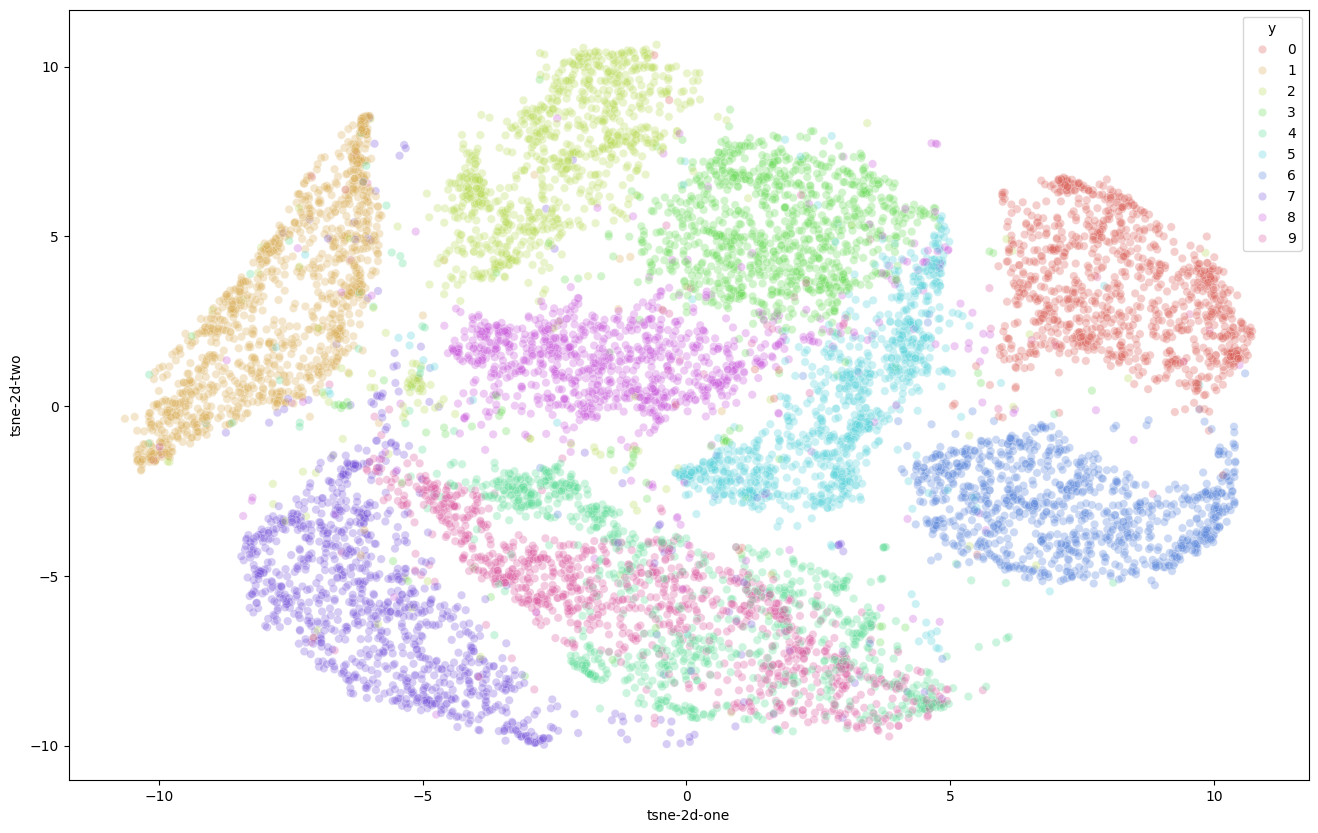

In [13]:
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    # legend="full",
    alpha=0.3,
)

plt.show()

This is already a significant improvement over the PCA visualisation we used earlier: we can see that the digits are very clearly clustered in their own sub groups. This means that, for this particular dataset, accounting for variation is not a good way to separate the different classes.

If we now used a clustering algorithm to pick out the separate clusters, we could probably quite accurately assign new points to a label.

Just to compare PCA with t-SNE:

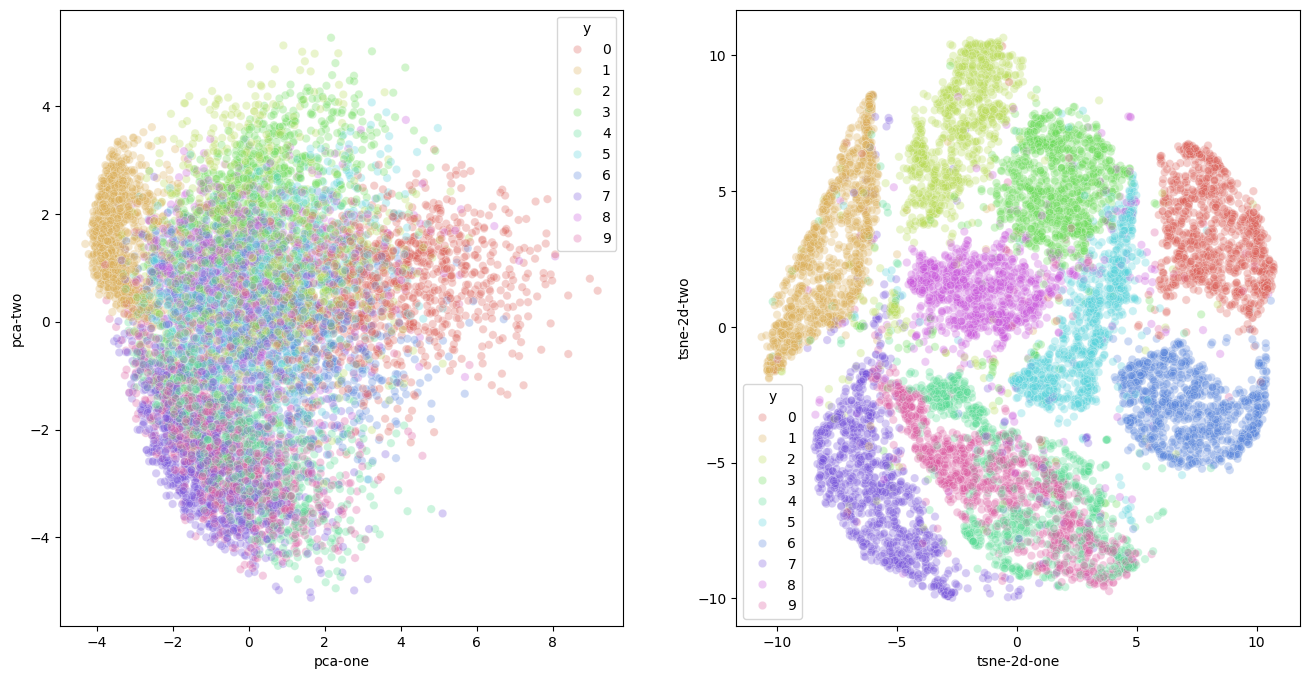

In [14]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    alpha=0.3,
    ax=ax1,
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    alpha=0.3,
    ax=ax2,
)

plt.show()

So far, we have obtained the t-SNE projection from all of the 784 input dimensions. We might wonder what would happen if we tried **using less information.**

We further reduce the number of dimensions before feeding the data into the t-SNE algorithm. To this aim, we use PCA again: 

1. First, we create a new dataset containing the 50 dimensions generated by the PCA reduction algorithm;
1. Then, we use this dataset as input to t-SNE.

In [15]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

print('Cumulative explained variation for 50 principal components: {}'.format(pca_50.explained_variance_ratio_.sum()))

Cumulative explained variation for 50 principal components: 0.8262021893487209


A **scree plot** shows the explained variance of each principal component:

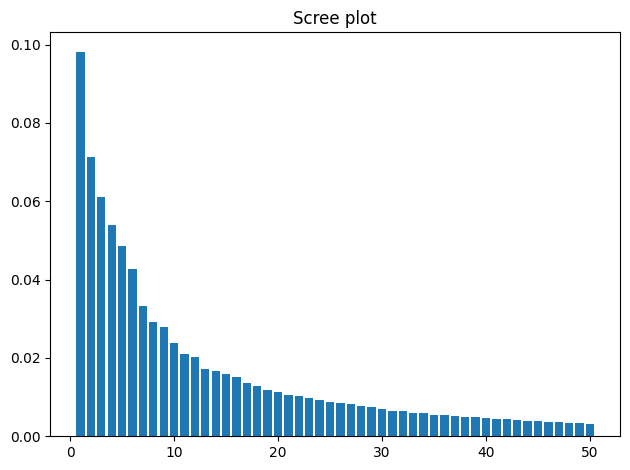

In [16]:
pc_values = np.arange(pca_50.n_components_) + 1
plt.bar(pc_values, pca_50.explained_variance_ratio_)
# or:
# plt.plot(pc_values, pca_50.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree plot')
plt.tight_layout()
plt.show()

The first 50 components roughly hold around 83% of the total variation in the data.
Now let's try and feed this data into the t-SNE algorithm.
Again, we'll use 10,000 samples out of the 70,000 to make sure the algorithm does not take up too much memory and CPU.

In [17]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, init='random', learning_rate=200)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE done! Time elapsed: 11.223589181900024 seconds


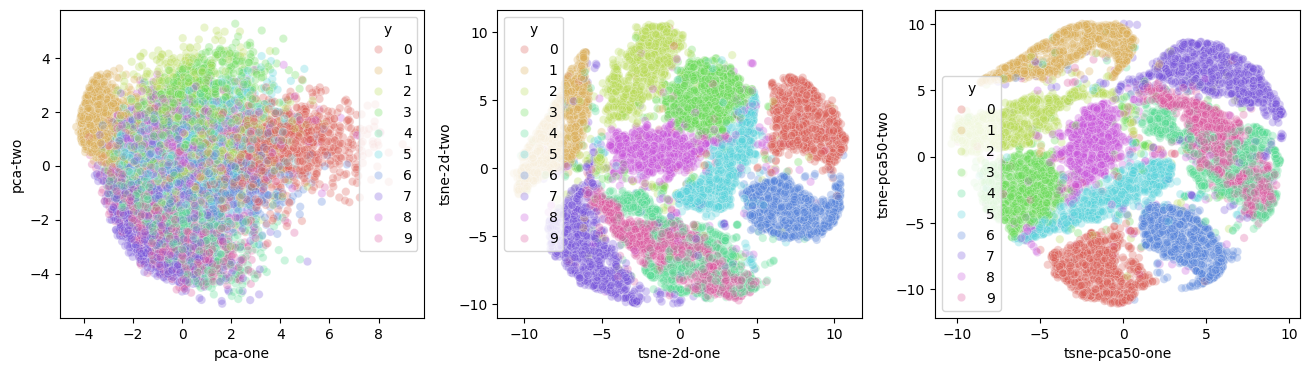

In [18]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:, 0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:, 1]

my_palette = sns.color_palette('hls', 10)

plt.figure(figsize=(16, 4))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=my_palette,
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=my_palette,
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=my_palette,
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

plt.show()

From this plot we can clearly see how all the samples are nicely spaced apart and grouped together with their respective digits.

Note that even reducing the dimensionality that much, we get a good separation of the digits. This implies that you could reduce a lot the dimensionality (and thus, the computational burden) while still obtaining a reasonable separation, which can then be the starting point for a clustering algorithm or for another algorithm (e.g. something like a Neural Network).

## Transforming new data with UMAP

UMAP is useful for generating visualisations, but if you want to **make use of UMAP more generally for machine learning tasks** it is important to be able to train a model and then later pass new data to the model and have it transform that data into the learned space. 

For example, if we use UMAP to learn a latent space and then train a classifier on data transformed into the latent space, then the classifier is only useful for prediction if we can transform data for which we want a prediction into the latent space the classifier uses. Fortunately, UMAP makes this possible, albeit more slowly than some other transformers that allow this.

Remember that, differently from t-SNE, **UMAP generates a real full projection** from the original space to the new space. This projection is based on the training points but is extended, as a geometrical map, to the whole space.

To install UMAP (and accessory packages) using `pip`: `pip install umap-learn[plot]`

To install UMAP (and accessory packages) using `conda`: `conda install umap-learn datashader bokeh holoviews colorcet scikit-image`

You'll also need to install or update `ipywidgets`: `pip install ipywidgets`

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef

sns.set(context='notebook', style='white', rc={'figure.figsize':(14, 10)})

To demonstrate this functionality we'll make use of another classical data set, `digits`, which is included in `scikit-learn` and is derived from the [UCI ML handwritten digits datasets](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [20]:
digits = load_digits()

In [21]:
digits.data.shape

(1797, 64)

In [22]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [23]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In the `digits` dataset, each sample is a 8x8 image of a digit (hence the 64 dimensions).
As we did for the MNIST data, we visualize a few images together with their ground truth label.

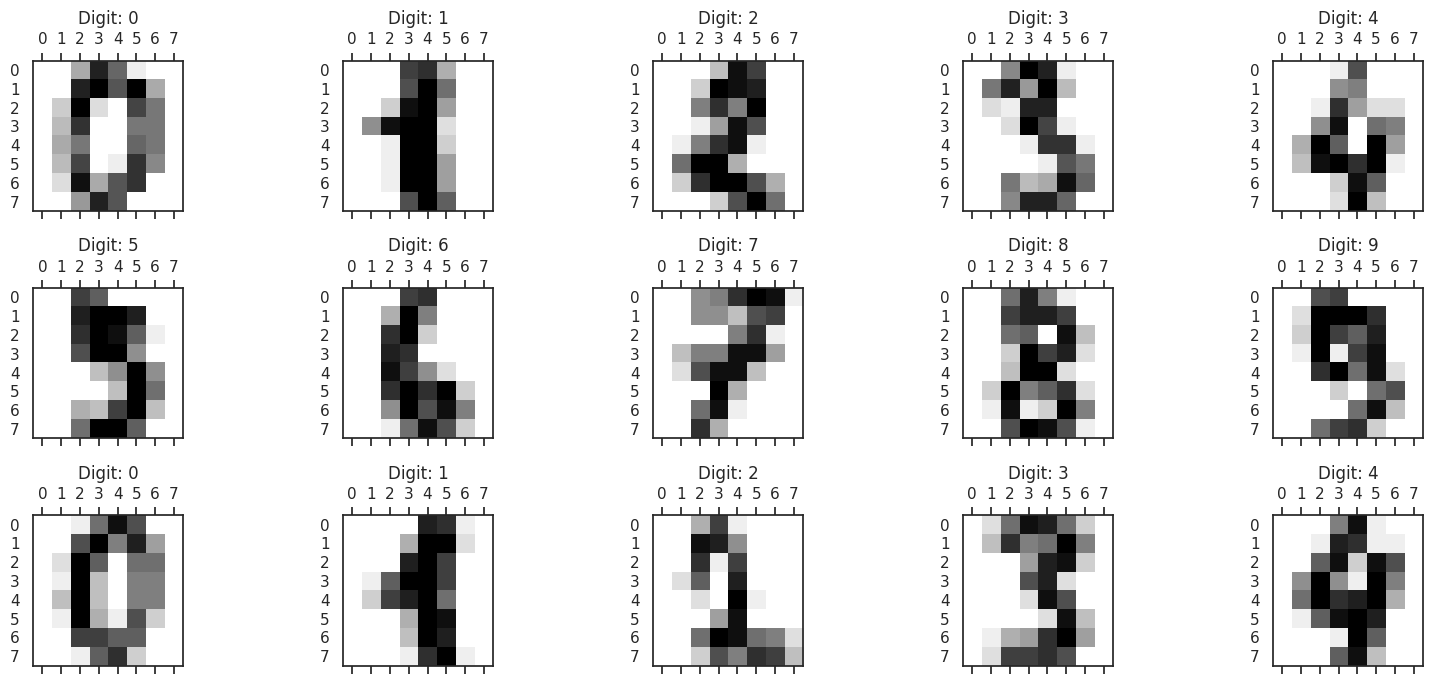

In [24]:
fig = plt.figure(figsize=(16, 7))

for i in range(0, 15):
    ax = fig.add_subplot(3, 5, i+1, title=f"Digit: {digits.target[i]}")
    ax.matshow(digits.data[i].reshape((8, 8)).astype(float), cmap=plt.cm.gray_r)

plt.tight_layout()
plt.show()

Another way of plotting a few images involves building a grid of axes and then looping through them plotting an image into each one in turn.

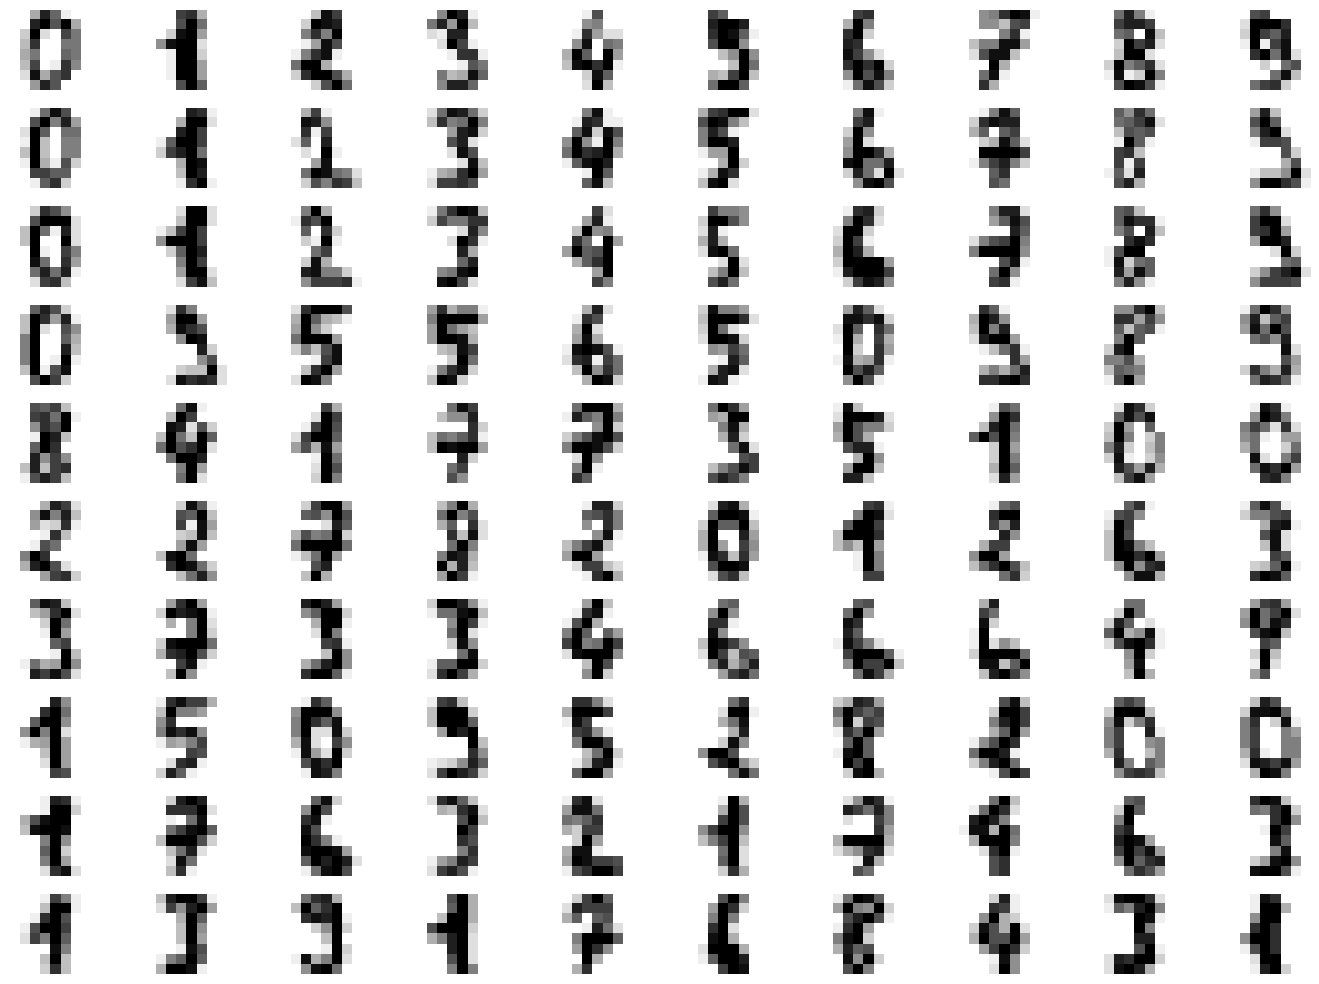

In [25]:
fig, ax_array = plt.subplots(10, 10)
axes = ax_array.flatten()

for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')

plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout()
plt.show()

The resolution of the images is quite low – for the most part we recognize them as digits, but sometimes they are so blurred that it is hard to guess even a human. The zeros stand out as the easiest to pick out. Beyond that, things get a little harder: some of the squashed eights look like ones, some of the threes start to look a little like crossed sevens when drawn badly, and so on.

Each 8x8 image can be flattened into a vector of 64 grayscale values. How much of the digits structure can we discern from these 64 values? 

At least in principle 64 dimensions is overkill for this task, and we would reasonably expect that there should be some smaller number of "latent" features that would be sufficient to describe the data reasonably well.

We could try a scatterplot matrix of just the first 10 dimensions:

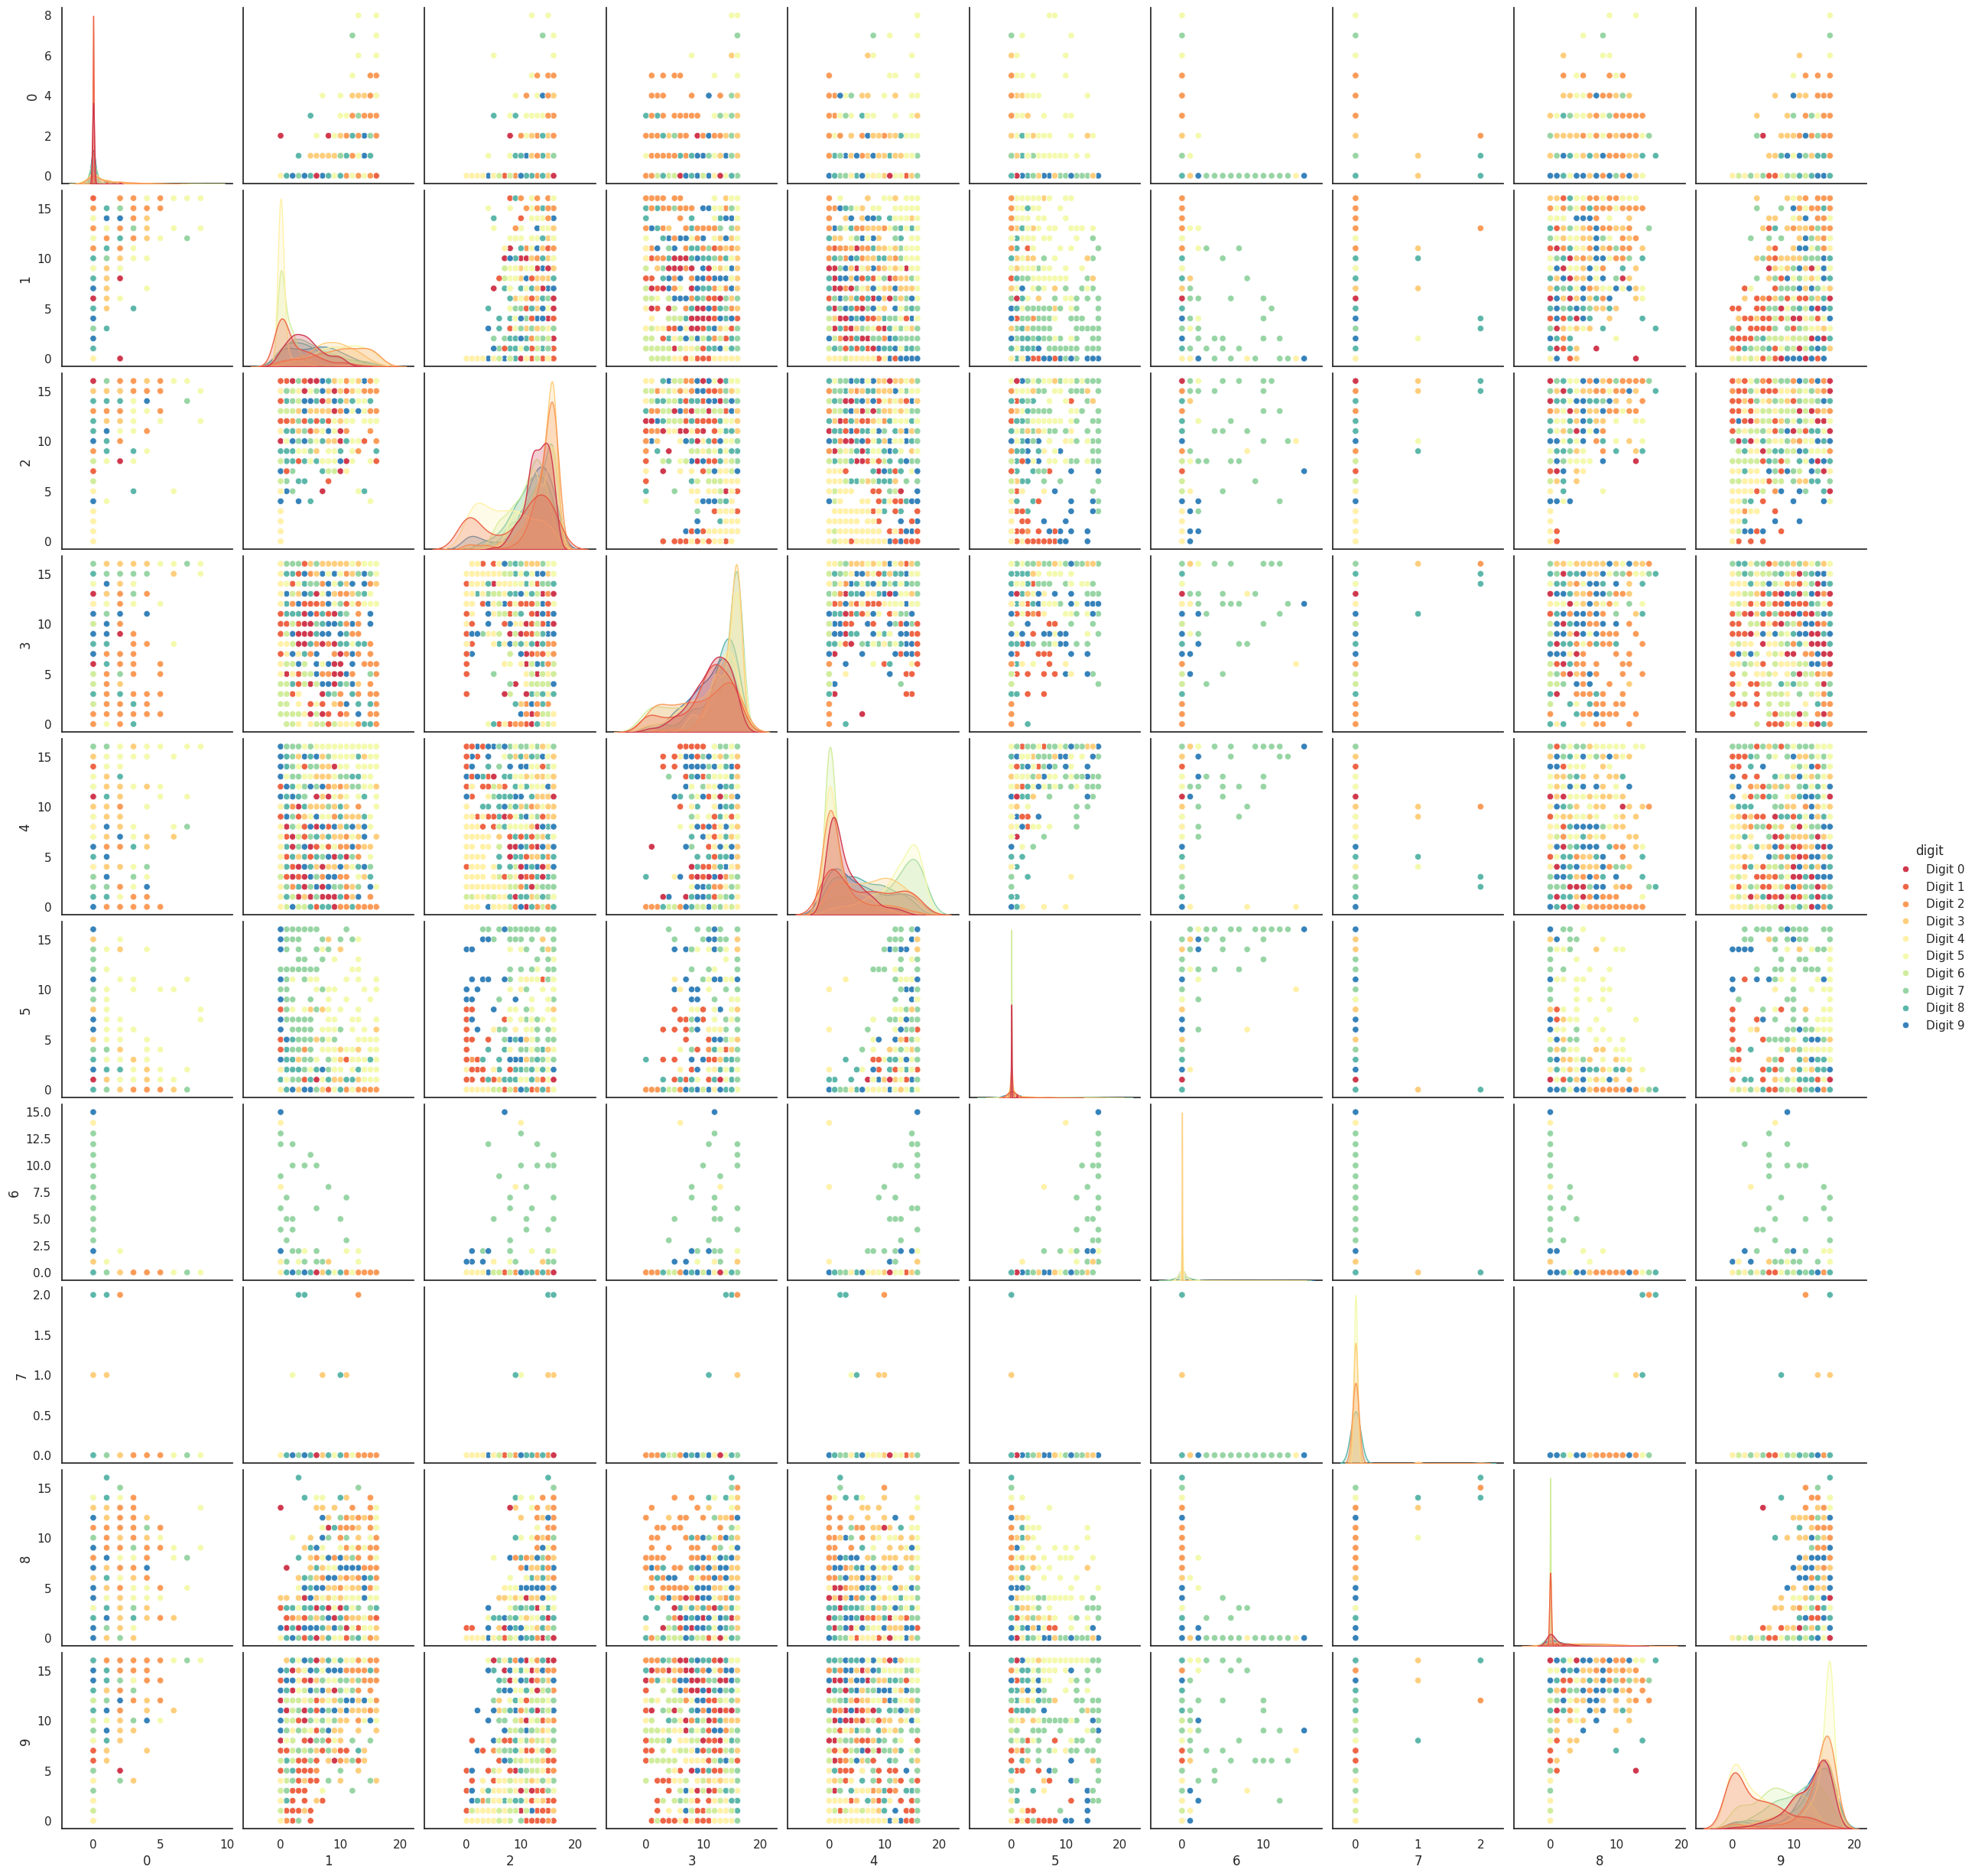

In [26]:
digits_df = pd.DataFrame(digits.data[:, 1:11])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: f'Digit {x}')
sns.pairplot(digits_df, hue='digit', palette='Spectral')
plt.show()

It seems like this approach is not feasible for this data.

Let's try UMAP!

In [28]:
import umap.umap_ as umap

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We need to first construct a UMAP object, and then to train our reducer, letting it learn about the manifold.

For this, UMAP follows the sklearn API and has a method `fit` which we pass the data we want the model to learn from. Then, the `transform` method will return the transformed data as a numpy array.

In [29]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [30]:
embedding = reducer.transform(digits.data)
embedding.shape

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(1797, 2)

We can now plot the resulting embedding, coloring the data points by the class that they belong to (the digit they represent).

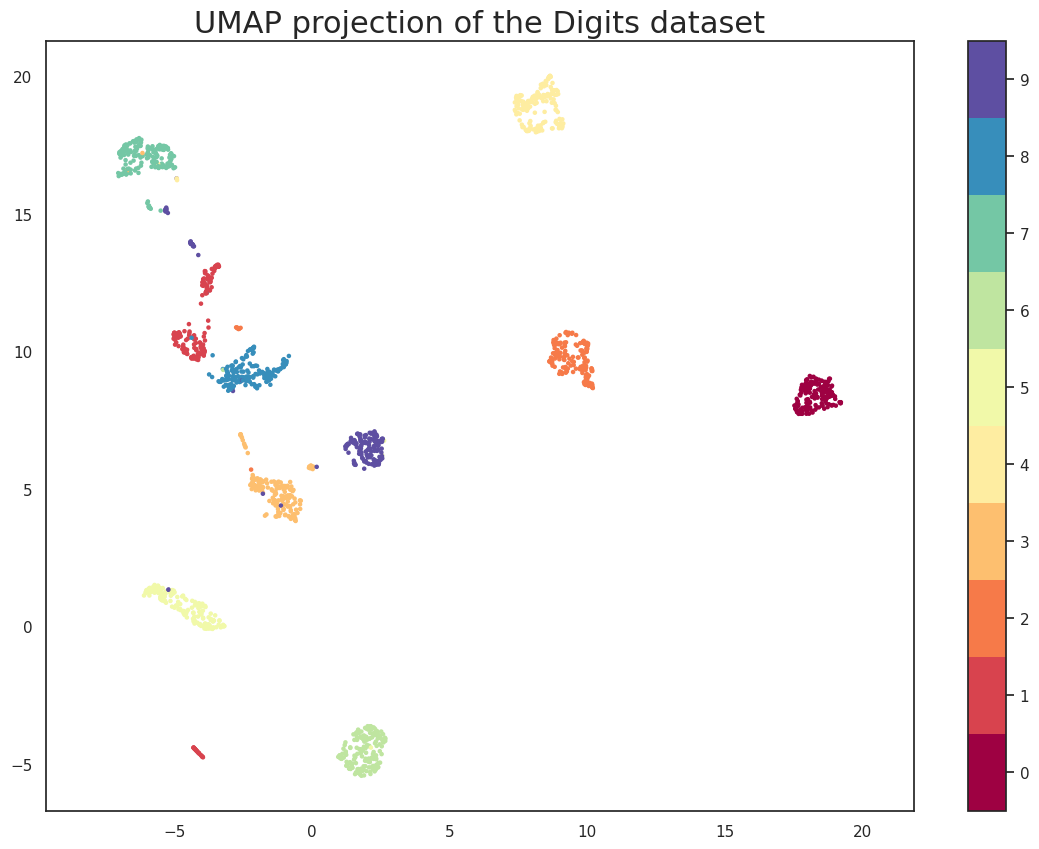

In [31]:
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=digits.target, 
            cmap='Spectral', 
            s=5)

plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=22)
plt.show()

You can improve UMAP visualizations by using the `umap.plot` module (`pip install umap-learn[plot]`).

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for th

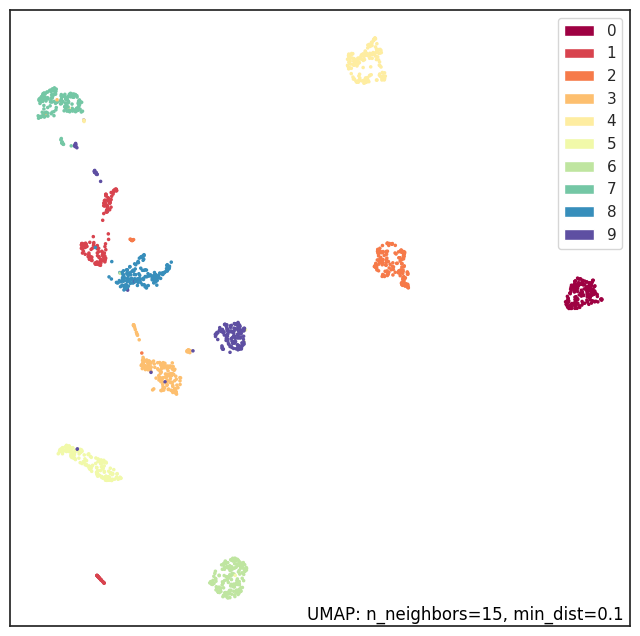

In [34]:
import umap.plot
umap.plot.points(reducer, labels=digits.target);

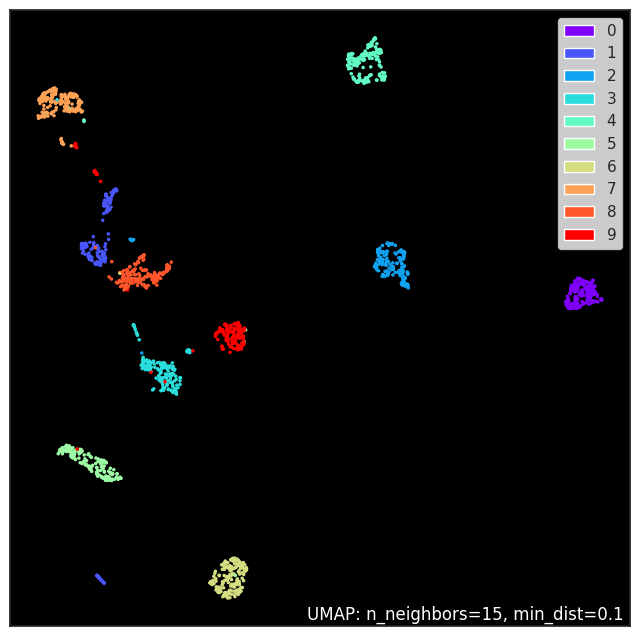

In [35]:
umap.plot.points(reducer, labels=digits.target, theme="fire"); # viridis, inferno, ... For more type "umap.plot.points?"

After this UMAP experimentation on the whole dataset, we see if we can use UMAP as a data transformed before fitting a machine learning model.

To avoid overfitting, we use sklearn `train_test_split` to divide into a training and test set (stratified over the different digit types). By default `train_test_split` will carve off 25% of the data for testing, which seems suitable in this case: otherwise, we can change the ratio through the argument `test_size`.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    test_size=0.25, # default
                                                    random_state=42, # set the random seed for reproducibility
                                                   )

To get a better understanding of what we are looking at, we now train a couple of different classifiers and then see how well they score on the test set. 

For this example, we fit a support vector classifier (SVC) and a K-nearest neighbor classifier (KNN). Note that ideally we should be tuning hyper-parameters (perhaps a grid search using k-fold cross-validation), but for the purposes of this simple demo we will simply use the default parameters for both classifiers:

* SVC - Gaussian (RBF) kernel, `C=1`, `gamma='scale'`, i.e. gamma = $1/\left(n_{features} * var(X)\right)$
* KNN - 5 neighbors

In [37]:
svc = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

The next question is how well these classifiers perform on the test set. Conveniently sklearn provides a `matthews_corrcoef` function to compute the Multiclass Matthews Correlation Coefficient (MCC).

In [38]:
print(f"SVC MCC: {matthews_corrcoef(svc.predict(X_test), y_test):.5f}")
print(f"KNN MCC: {matthews_corrcoef(knn.predict(X_test), y_test):.5f}")

SVC MCC: 0.99015
KNN MCC: 0.98276


Since the max value of MCC is close to one, both classifiers are doing very well.

The goal now is to make use of UMAP as a preprocessing step that one could potentially inject into a pipeline.

In [39]:
tf = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train)

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Since we embedded to two dimensions, as before we can visualise the results to ensure that we are getting a potential benefit out of this approach. Note that the embedded training data can be accessed as the `.embedding_` attribute of the UMAP model, once we have fit it to some data.

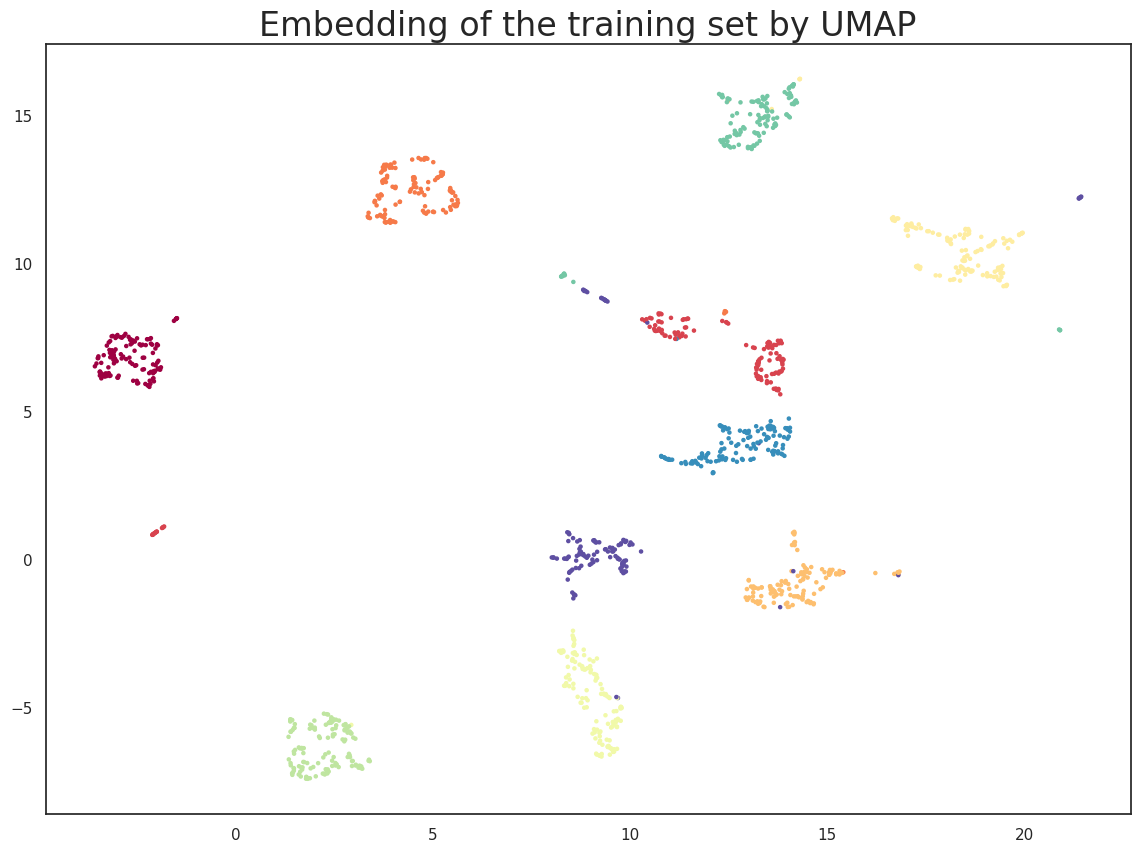

In [40]:
plt.scatter(tf.embedding_[:, 0], tf.embedding_[:, 1],
            c=y_train,
            cmap='Spectral',
            s=5)

plt.title('Embedding of the training set by UMAP', fontsize=24);

Again, this looks very promising! Most of the classes got very neatly separated, and that gives us some hope that it could help with classifier performance. It is worth noting that this was a *completely unsupervised* data transform.

We can now train some new models (again an SVC and a KNN classifier) on the embedded training data. This looks exactly as before but now we pass it the embedded data. Note that calling `transform` on input identical to what the model was trained on will simply return the `embedding_` attribute, so sklearn pipelines will work as expected.

In [41]:
svc = SVC(kernel='rbf', gamma='scale').fit(tf.embedding_, y_train)
knn = KNeighborsClassifier().fit(tf.embedding_, y_train)

Now we want to work with the test data, which none of the models (UMAP or the classifiers) have seen.
To do this we use the standard sklearn API and make use of the `transform` method, this time handing it the new unseen test data. We will assign this to `test_embedding` so that we can take a closer look at the result of applying an existing UMAP model to new data.

In [42]:
%time test_embedding = tf.transform(X_test)

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CPU times: user 4.27 s, sys: 12.5 ms, total: 4.29 s
Wall time: 3.56 s


Note that the transform operations works very efficiently. Compared to some other transformers this is a little on the slow side, but it is fast enough for many uses. Note that as the size of the training and/or test sets increase, the performance will drop proportionally. It is also worth noting that the first call to `transform` may be slow due to the underlying Numba JIT (just-in-time) overhead – further runs will be very fast.

In [43]:
%time test_embedding = tf.transform(X_test)

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CPU times: user 899 ms, sys: 25.7 ms, total: 925 ms
Wall time: 744 ms


The next important question is what the transform did to our test data. In principle we have a new 2D representation of the test set. Ideally this should be based on the existing embedding of the training set. 

We can check this by visualising the data (since we are in two dimensions). A simple scatterplot as before will suffice.

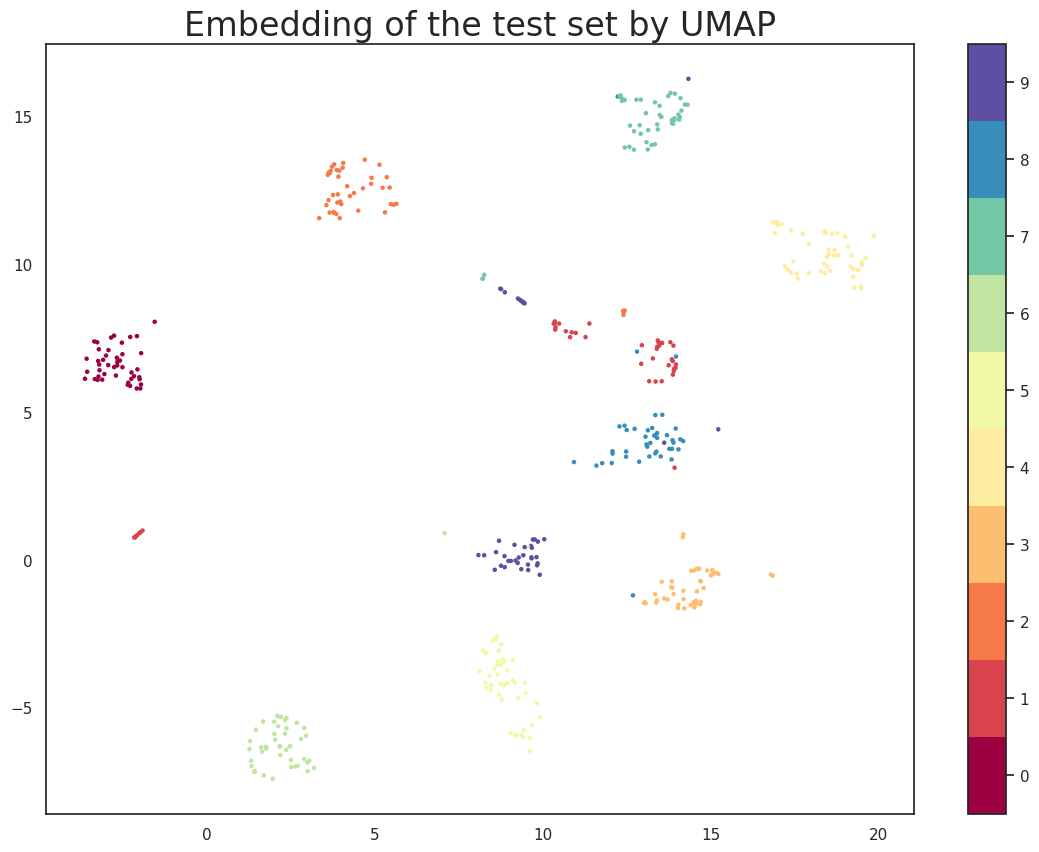

In [44]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1],
            c=y_test,
            cmap='Spectral',
            s=5)

plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title('Embedding of the test set by UMAP', fontsize=24);

The results look like what we expected: the test data has been embedded into two dimensions in the locations we should expect (by class) given the embedding of the training data visualised above. This means we can now evaluate the models that were trained on the embedded training data by handing them the newly transformed test set.

In [45]:
print(f"SVC MCC: {matthews_corrcoef(svc.predict(tf.transform(X_test)), y_test):.5f}")
print(f"KNN MCC: {matthews_corrcoef(knn.predict(tf.transform(X_test)), y_test):.5f}")

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


SVC MCC: 0.93177


/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


KNN MCC: 0.97533


The results are pretty good, with performances only slightly worse w.r.t. the plain test data. The point here is that we can use UMAP as if it were a standard sklearn transformer as part of an sklearn machine learning [pipeline](https://scikit-learn.org/stable/modules/compose.html#combining-estimators).

Just for fun we can run the same experiments, but this time reducing to ten dimensions (which we can no longer visualise). In practice this will have little gain in this case – for the digits dataset, two dimensions is plenty for UMAP and more dimensions will not help. On the other hand, for more complex datasets where more dimensions may allow for a much more faithful embedding, it is worth noting that we are not restricted to only two dimensions.

In [46]:
tf2 = umap.UMAP(n_neighbors=5, n_components=10, random_state=42).fit(X_train)

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [47]:
svc = SVC(kernel='rbf', gamma='scale').fit(tf2.embedding_, y_train)
knn = KNeighborsClassifier().fit(tf2.embedding_, y_train)

In [48]:
print(f"SVC MCC: {matthews_corrcoef(svc.predict(tf2.transform(X_test)), y_test):.5f}")
print(f"KNN MCC: {matthews_corrcoef(knn.predict(tf2.transform(X_test)), y_test):.5f}")

/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


SVC MCC: 0.96313


/home/dorijan/Desktop/Dataviz/lab/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


KNN MCC: 0.98028


And we see that in fact we marginally improved the SVC score. However, for more interesting datasets a larger dimensional embedding might have a more significant gain - it is certainly worth exploring as one of the parameters in a grid search across a pipeline that includes UMAP.

----

(partially abridged from [Visualising high-dimensional datasets using PCA and t-SNE in Python](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b) and [Transforming New Data with UMAP](https://umap-learn.readthedocs.io/en/latest/transform.html))

Rememebr that dimensionlaity reduction, you always lose some data but it can be really useful for data visualization.

In general, t-SNE is not much used while PCA and UMAP are the main ones depending on the data at usage.
PCA uses the notion of covariance while UMAP the one of manifolds. Both can project the data while t-SNE cannot do it.